## Análise exploratória de dados - Ifood

Este é um estudo proposto ao término da Aula 1 (Estatística descritiva) do curso Estatística do Básico ao Avançado (EBA).
O desafio é analisar um conjunto de dados da empresa Ifood e responder algumas hipóteses.

Esse conjunto de dados é composto por clientes da empresa com dados sobre:

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal

### Sumário:
#### Etapa 1 - Conhecendo os dados:
1. Quantos dados temos?
2. Quais colunas são numéricas?
3. Quais colunas são categóricas?
4. Temos duplicados na base? (Precisam ser removidos)
5. Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
6. Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

#### Etapa 2 - Conhecendo o perfil dos clientes:

1. Qual é o maior salário encontrado na base?
2. Existem outliers nos salários apresentados na base?
3. Qual é a distribuição de salário na base? Existem clientes que ganham muito bem e outros que não ganham muito bem?
4. Qual a distribuição de salário por nível de escolaridade e pelo estado civil?
5. Os clientes tem níveis de educação maiores ou menores?
6. Quantos clientes existem em cada estado civil?
7. Qual a distribuição das despesas por nível de escolaridade e estado civil?
8. Qual é a relação de estado civil com número de filhos? 

#### Etapa 3 - Criando Hipóteses:

1. Clientes solteiros consomem menos do que clientes casados.
2. Clientes com um número maior de visitas tendem a consumir mais que clientes com menor número
3. Clientes que possuem filhos tendem a gastar mais com doces do que com frutas.
4. Clientes gastam mais na plataforma quando tem filhos.
5. Clientes com idade acima dos 40 tendem a reclamar mais.
6. Clientes mais antigos na plataforma tendem a ser mais fiéis e consomem mais.
7. Clientes com maior idade tendem a aceitar menos campanhas.
8. Clientes casados têm um maior número de filhos.
9. Clientes que têm um maior salário gastam mais.

#### Importando bibliotecas

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

#### Configurações

In [2]:
pd.set_option('display.max_colwidth', 1)
pd.set_option('display.max_columns', None)

cores = ['#F40000', '#F44E3F', '#F4796B', '#F4998D', '#FFFFFF']

### Dicionário dos dados

In [3]:
dicionario = pd.read_json('variaveis.json')
dicionario.index = ['Descrição']

dicionario.T

,Descrição
Income,Renda anual do cliente em moeda local.
Kidhome,Número de crianças no lar do cliente.
Teenhome,Número de adolescentes no lar do cliente.
Recency,Dias desde a última compra do cliente.
MntWines,Gasto total em vinhos.
MntFruits,Gasto total em frutas.
MntMeatProducts,Gasto total em produtos de carne.
MntFishProducts,Gasto total em produtos de peixe.
MntSweetProducts,Gasto total em doces.
MntGoldProds,Gasto total em produtos de ouro. [?]


In [4]:
df = pd.read_csv('mkt_data.csv', encoding='latin1')
df.drop('Unnamed: 0', axis=1, inplace=True)

### Conhecendo os dados

In [5]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


**1. Quantos dados temos?**

In [6]:
print(f'Este dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

Este dataframe possui 2205 linhas e 43 colunas.


**2. Quais colunas são numéricas?**

**3. Quais colunas são categóricas?**

In [7]:
variaveis_numericas = [col for col in df.columns if df[col].dtype in ('int', 'float')]
variaveis_categoricas = [col for col in df.columns if str(df[col].dtype) in ('object')]

print(f'A base de dados contém {len(variaveis_numericas)} variáveis numéricas sendo elas:\n\n{variaveis_numericas}')
print(f'\nApenas {len(variaveis_categoricas)} são categóricas:\n\n{variaveis_categoricas}')

A base de dados contém 41 variáveis numéricas sendo elas:

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'kids', 'expenses']

Apenas 2 são categóricas:

['marital_status', 'education_level']


**4. Temos duplicados na base? (Precisam ser removidos)**

In [8]:
duplicados = len(df[df.duplicated(keep = 'first')])

if duplicados:
    print(f'Existem {duplicados} registros duplicados')

    df.drop_duplicates(inplace=True, ignore_index=True)
    print('\nRegistros deletados com sucesso')
else:
    print('Não há registros duplicados')

Existem 184 registros duplicados

Registros deletados com sucesso


**5. Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?**

In [9]:
nulos = pd.DataFrame(df.isna().sum())
nulos['1'] = len(df)
nulos['2'] = nulos.index

nulos = nulos.reset_index(drop=True)
nulos.columns = ['Nulos', 'Total', 'Variável']

nulos = nulos.reset_index(drop=True)

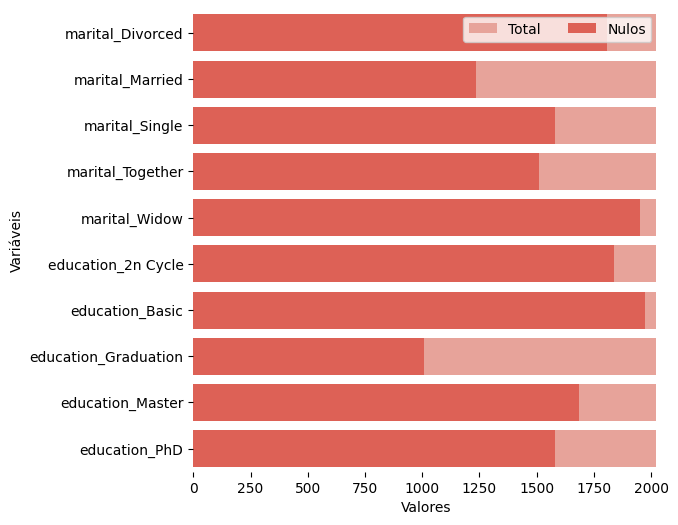

In [10]:
f, ax = plt.subplots(figsize=(6, 6))

nulos_filtrados = nulos.query("Nulos != 0")


sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Variável", data=nulos_filtrados,
            label="Total", color="#F4998D", ax=ax)

sns.set_color_codes("muted")
sns.barplot(x="Nulos", y="Variável", data=nulos_filtrados,
            label="Nulos", color="#F44E3F", ax=ax)

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, max(nulos["Total"]) + 10),
       xlabel="Valores",
       ylabel="Variáveis")
sns.despine(left=True, bottom=True)

Pode parecer assustador variáveis possuírem um grande índice de nulos. Mas é preciso analisar com cuidado! 
Podemos perceber que tratam-se de variáveis booleanas e a ausência de dados significa que aqueles dados não pertencem ao grupo evidenciado na variável.

Abaixo temos uma validação, para garantir que a somatória de valores não nulos em cada variável (considerar o mesmo grupo) descrita acima, é igual ao número de observações no dataframe. Se isso ocorrer, as variáveis poderão ser atualizadas como booleanas.

In [11]:
def valida_variaveis_booleanas(prefixo: str) -> pd.DataFrame:
    encontrar_variaveis = lambda x: x if prefixo in x else False #Procura variáveis que possuam o prefixo determinado
    variaveis_encontradas = list(map(encontrar_variaveis, df.columns)) #Aplica a função lambda nas colunas do dataframe
    variaveis_encontradas_filtradas = list(filter(lambda x: type(x) == str and df[x].isna().sum() > 0, variaveis_encontradas)) #Retorna apenas os valores desejados.
    
    volumetrias_encontradas = [df[var].count() for var in variaveis_encontradas_filtradas] # somam os valores não nulos encontrados

    if sum(volumetrias_encontradas) == len(df):
        print(f'A somatória de valores não nulos das variáveis {variaveis_encontradas_filtradas} é igual ao número de registros do dataframe.')
        
        atualiza_variaveis_booleanas(variaveis_encontradas_filtradas) # aplica a transformação em variáveis booleanas
    else:
        print('As variáveis encontradas não podem ser tratadas como booleanas')

    return df

def atualiza_variaveis_booleanas(variaveis: list) -> pd.DataFrame:
    for var in variaveis:
        df[var] = df[var].apply(lambda x: 0 if pd.isna(x) else 1)

    print('Variáveis tratadas com sucesso.\n')

    return df

df = valida_variaveis_booleanas('marital')
df = valida_variaveis_booleanas('education')

A somatória de valores não nulos das variáveis ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'] é igual ao número de registros do dataframe.
Variáveis tratadas com sucesso.

A somatória de valores não nulos das variáveis ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'] é igual ao número de registros do dataframe.
Variáveis tratadas com sucesso.



**6. Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?**

In [12]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.0,2021.0,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,2.330035,4.115289,2.644730,5.807521,5.340426,0.074715,0.076695,0.072241,0.065809,0.012865,0.009401,3.0,11.0,0.153884,51.117269,2511.613063,0.105888,0.388422,0.219198,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326,0.952994,563.789213
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,1.892778,2.753588,2.799126,3.230434,2.426319,0.262997,0.266172,0.258951,0.248009,0.112720,0.096527,0.0,0.0,0.360927,11.667616,202.546762,0.307771,0.487512,0.413806,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812,0.746123,576.775749
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000,0.000000,4.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,43.000000,2337.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000,0.000000,55.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,50.000000,2511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000,1.000000,343.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000,3.000000,2491.000000


### Conhecendo o perfil dos clientes

**1. Qual é o maior salário encontrado na base?**

In [13]:
print(df['Income'].max())

113734.0


**2. Existem outliers nos salários apresentados na base?**

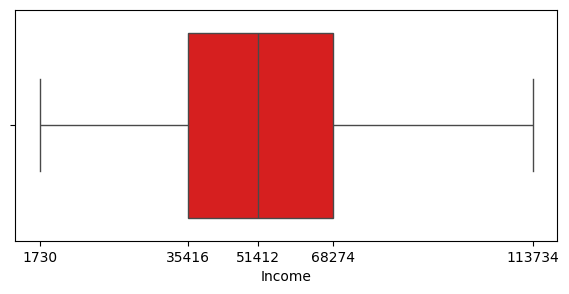

In [14]:
sns.set_palette(sns.color_palette(cores))
f, ax = plt.subplots(figsize=(7, 3))
sns.boxplot(x=df["Income"])
ax.set_xticks([1730, 35416, 51412, 68274, 113734])
plt.show()

Não existem outliers nessa variável quando não aplicado uma distinção por categoria.

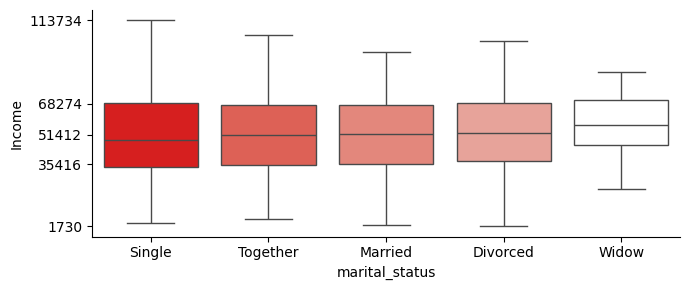

In [15]:
sns.set_palette(sns.color_palette(cores))
g = sns.catplot(data=df, x="marital_status", y="Income", kind="box", height=3, aspect=7/3, hue="marital_status", legend=False)

g.ax.set_yticks([1730, 35416, 51412, 68274, 113734])

sns.despine()
plt.show()

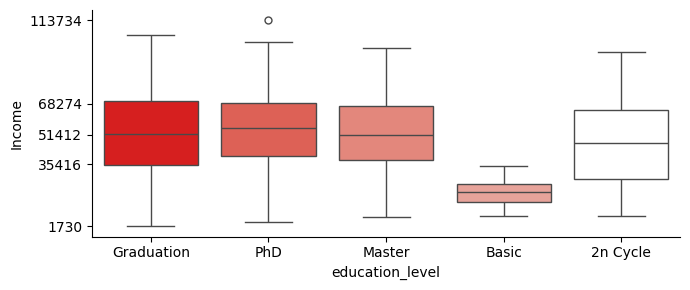

In [16]:
sns.set_palette(sns.color_palette(cores))
g = sns.catplot(data=df, x="education_level", y="Income", kind="box", height=3, aspect=7/3, hue="education_level", legend=False)

g.ax.set_yticks([1730, 35416, 51412, 68274, 113734])

sns.despine()
plt.show()

**3. Qual é a distribuição de salário na base? Existem clientes que ganham muito bem e outros que não ganham muito bem?**

**4. Qual a distribuição de salário por nível de escolaridade e pelo estado civil?**

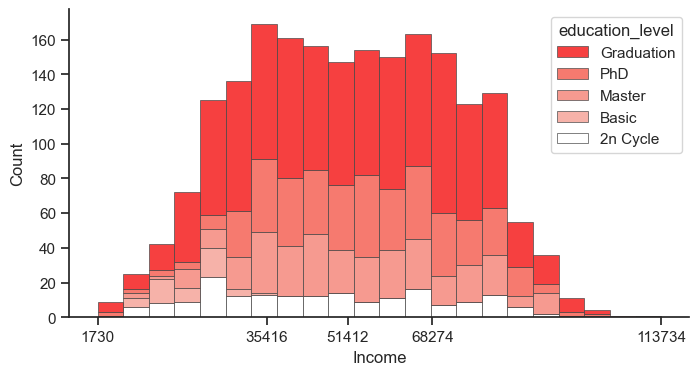

In [17]:
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(cores))

f, ax = plt.subplots(figsize=(8, 4))
sns.despine(f)

sns.histplot(
    df,
    x="Income", hue="education_level",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)

ax.set_xticks([1730, 35416, 51412, 68274, 113734])

plt.show()

Existe uma distribuição próxima da normal, com uma leve predominância para maiores salários devido ao skew igual a `0.00435`. Existem casos onde há clientes ganhando pouco e também ganhando muito. Podemos perceber que existe uma predominância de alunos que possuem graduação nessa variável.

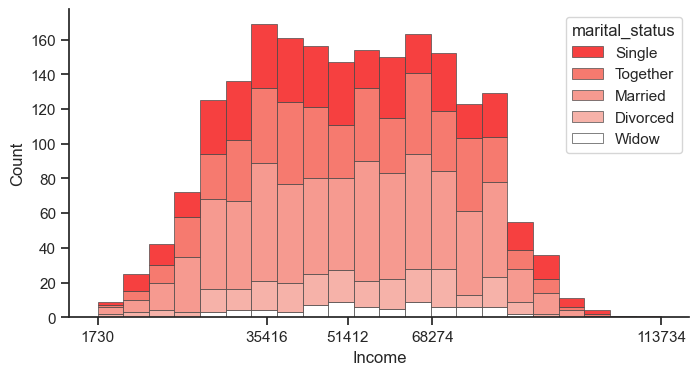

In [18]:
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(cores))

f, ax = plt.subplots(figsize=(8, 4))
sns.despine(f)

sns.histplot(
    df,
    x="Income", hue="marital_status",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)

ax.set_xticks([1730, 35416, 51412, 68274, 113734])

plt.show()

Clientes que são casados tendem a ter maiores salários.

**5. Os clientes tem níveis de educação maiores ou menores?**

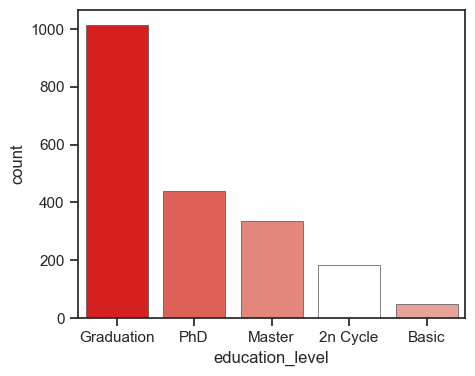

In [19]:
sns.set_palette(sns.color_palette(cores))

f, ax = plt.subplots(figsize=(5, 4))
sns.countplot(x='education_level', data=df, order=df['education_level'].value_counts().index, hue='education_level', legend=False, edgecolor='.3', linewidth=.5)
plt.show()

Clientes com maior nível de escolaridade predominam nessa base.

**6. Quantos clientes existem em cada estado civil?**

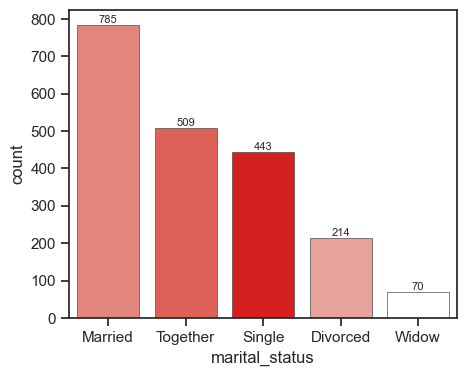

In [20]:
sns.set_palette(sns.color_palette(cores))
plt.rcParams['font.size'] = 8

f, ax = plt.subplots(figsize=(5, 4))
sns.countplot(x='marital_status', data=df, order=df['marital_status'].value_counts().index, hue='marital_status', legend=False, edgecolor='.3', linewidth=.5)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**7. Qual a distribuição das despesas por nível de escolaridade e estado civil?**

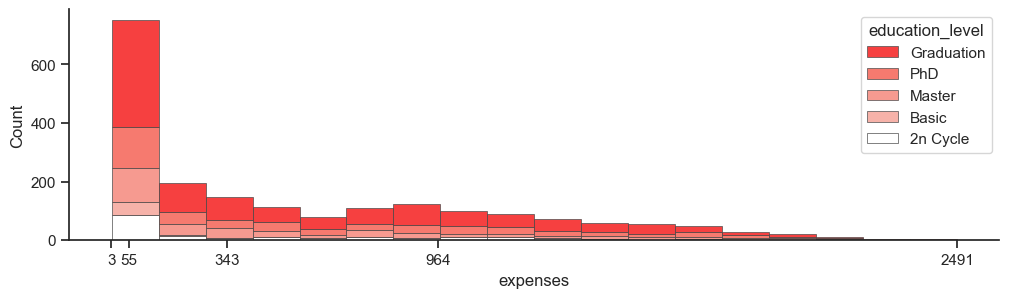

In [21]:
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(cores))

f, ax = plt.subplots(figsize=(12, 3))
sns.despine(f)

sns.histplot(
    df,
    x="expenses", hue="education_level",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)

ax.set_xticks([3, 55, 343, 964, 2491])

plt.show()

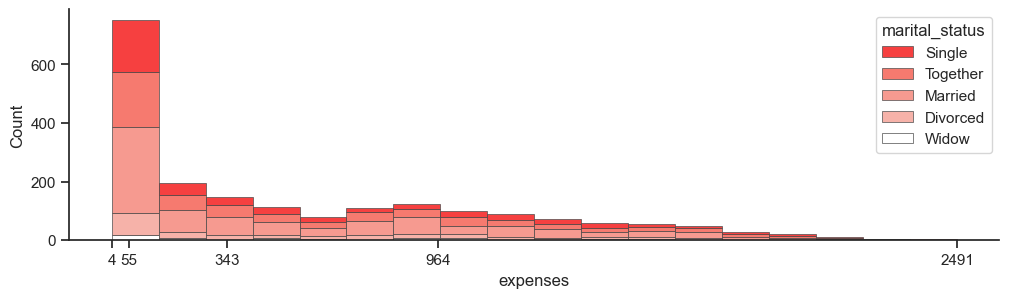

In [22]:
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(cores))

f, ax = plt.subplots(figsize=(12, 3))
sns.despine(f)

sns.histplot(
    df,
    x="expenses", hue="marital_status",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)

ax.set_xticks([4, 55, 343, 964, 2491])

plt.show()

8. Qual é a relação de estado civil com número de filhos? 

In [23]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,214.0,1.023364,0.753344,0.0,1.0,1.0,1.0,3.0
Married,785.0,0.977070,0.724558,0.0,0.0,1.0,1.0,3.0
Single,443.0,0.860045,0.771850,0.0,0.0,1.0,1.0,3.0
Together,509.0,0.982318,0.748806,0.0,0.0,1.0,1.0,3.0
Widow,70.0,0.842857,0.734960,0.0,0.0,1.0,1.0,2.0


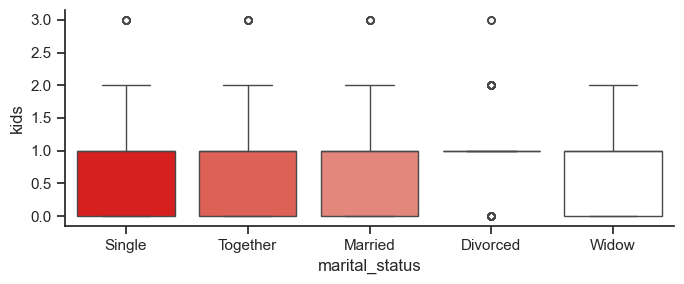

In [24]:
sns.set_palette(sns.color_palette(cores))
g = sns.catplot(data=df, x="marital_status", y="kids", kind="box", height=3, aspect=7/3, hue='marital_status', legend=False)

sns.despine()
plt.tight_layout()
plt.show()

Não há indicios de relação. A distribuição é semelhante para boa parte das classes existentes no estado civil. Tendo uma maior variabilidade nos clientes divorciados e uma pequena variabilidade nos viúvos.

#### Criando Hipóteses

**1. clientes solteiras consomem menos do que clientes casadas?**

In [25]:
marital_single_married = df.query("marital_status in ('Single', 'Married')")

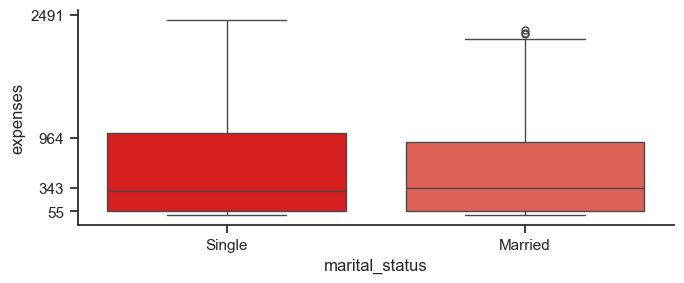

In [26]:
g = sns.catplot(data=marital_single_married, x="marital_status", y="expenses", kind="box", height=3, aspect=7/3, hue="marital_status", legend=False)

g.ax.set_yticks([55, 343, 964, 2491])

sns.despine()
plt.tight_layout()
plt.show()

In [27]:
for cat in ['Single', 'Married']:
    media = round(df.query(f"marital_status in ('{cat}')")['expenses'].mean(), 4)
    print(f'O valor do gasto médio para a categoria "{cat}" é: {media}.')

O valor do gasto médio para a categoria "Single" é: 567.9007.
O valor do gasto médio para a categoria "Married" é: 549.6115.


Ambas as categorias possuem um gasto semelhante. Para ter certeza, futuramente será realizado um teste de significância estatísca.

**2. clientes com um número maior de visitas tendem a consumir mais que clientes com menor número?**

In [28]:
faixa_visitas = df[['NumWebVisitsMonth', 'expenses']].copy()
faixa_visitas['Faixa acessos'] = df['NumWebVisitsMonth'].map(lambda x: 'Poucos acessos' if x < df['NumWebVisitsMonth'].median() else 'Muitos acessos')

In [29]:
faixa_visitas.groupby('Faixa acessos')['expenses'].agg(['mean', 'median', 'std'])

,mean,median,std
Faixa acessos,,,
Muitos acessos,336.783886,120.0,438.135636
Poucos acessos,811.709110,806.5,607.317187


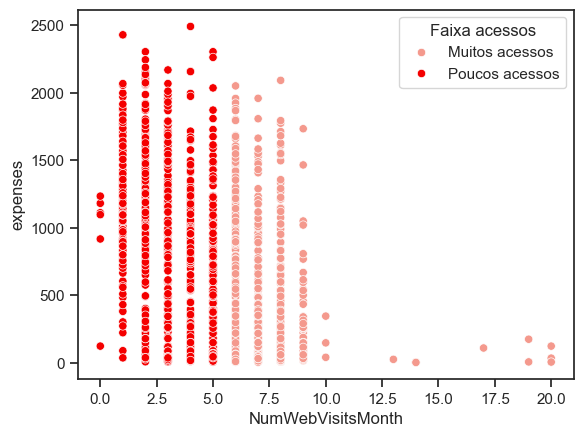

In [30]:
sns.set_palette(sns.color_palette(["#F4998D", "#F40000"]))

sns.scatterplot(data=faixa_visitas, x='NumWebVisitsMonth', y='expenses', hue='Faixa acessos')
plt.show()

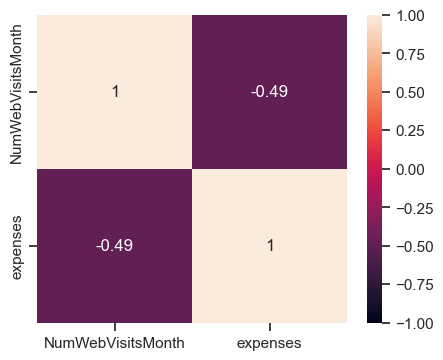

In [31]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(faixa_visitas[['NumWebVisitsMonth', 'expenses']].corr(), vmin=-1, vmax=1, annot=True)
plt.show(3)

Suponho que clientes com menos acessos tendem a gastar mais, conforme análises.  Para ter certeza, futuramente será realizado um teste de significância estatísca.

**3. Clientes que possuem filhos tendem a gastar mais com doces do que com frutas?**

In [32]:
analise_filhos = df[['MntFruits', 'MntSweetProducts', 'expenses', 'kids']].copy()
analise_filhos['possui_filhos'] = analise_filhos['kids'].map(lambda x: 1 if x > 0 else 0)

In [33]:
analise_filhos.groupby('possui_filhos')[['MntFruits', 'MntSweetProducts']].agg(['mean', 'median', 'std'])

MntFruits                   MntSweetProducts                  
                    mean median        std             mean median        std
possui_filhos                                                                
0              53.082892  34.0   50.578440  54.377425        37.0   52.030625
1              15.945667  4.0    28.563409  16.697387        5.0    30.820092

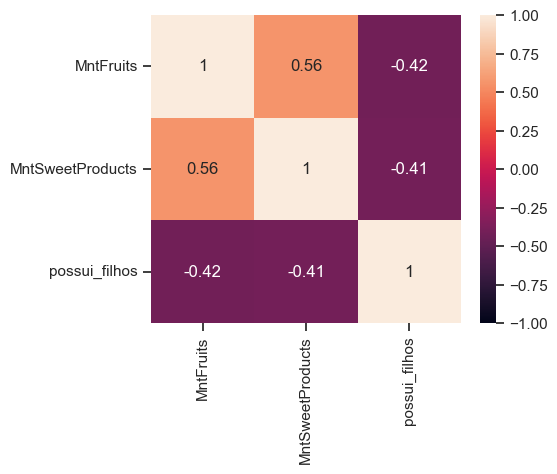

In [34]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(analise_filhos[['MntFruits', 'MntSweetProducts', 'possui_filhos']].corr(), vmin=-1, vmax=1, annot=True)
plt.show(3)

O gasto em ambas as categorias é semelhante em clientes que possuem filhos.

**4. Clientes gastam mais na plataforma quando tem filhos.**

In [35]:
analise_filhos.groupby('possui_filhos')['expenses'].agg(['mean', 'median', 'std'])

,mean,median,std
possui_filhos,,,
0,1056.282187,1114.0,622.282197
1,371.737276,182.0,424.364730


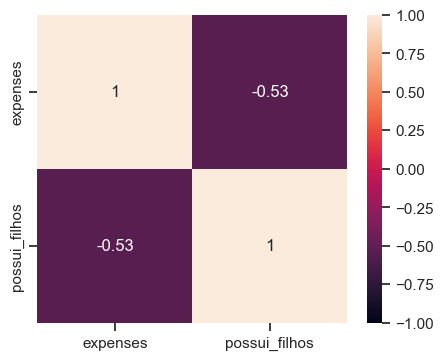

In [36]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(analise_filhos[['expenses', 'possui_filhos']].corr(), vmin=-1, vmax=1, annot=True)
plt.show(3)

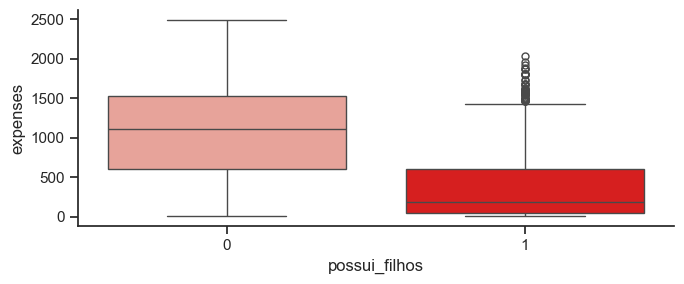

In [37]:
g = sns.catplot(data=analise_filhos, x="possui_filhos", y="expenses", kind="box", height=3, aspect=7/3, hue="possui_filhos", legend=False)

sns.despine()
plt.tight_layout()
plt.show()

Suponho que clientes que não possuam filhos gastem mais do que clientes com filhos. Para ter certeza, futuramente será realizado um teste de significância estatísca.

**5. Clientes com idade acima dos 40 tendem a reclamar mais.**

In [38]:
idade_df = df[['Age', 'Complain', 'AcceptedCmpOverall']].copy()
idade_df['40+'] = idade_df['Age'].map(lambda x: 1 if x > 40 else 0)

In [39]:
idade_df.groupby(["40+"])["Complain"].agg(['count', 'sum', 'mean', 'std'])

,count,sum,mean,std
40+,,,,
0,382,5,0.013089,0.113805
1,1639,14,0.008542,0.092054


O grupo com menor idade apresenta uma maior média de reclamações, mas não podemos afirmar sem realizar um teste estatístico.

**6. Clientes mais antigos na plataforma tendem a ser mais fiéis e consomem mais.**

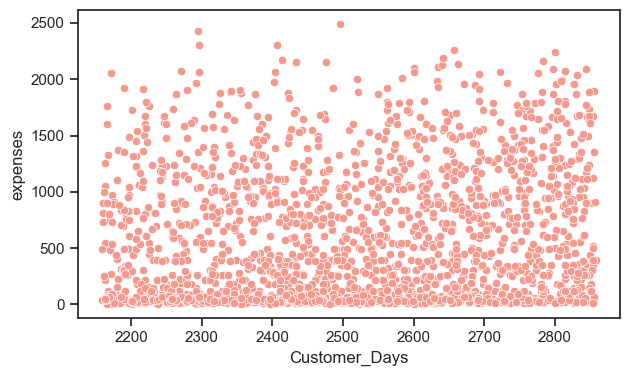

In [40]:
f, ax = plt.subplots(figsize=(7, 4))
sns.set_palette(sns.color_palette(["#F44E3F"]))
sns.scatterplot(data=df, x='Customer_Days', y='expenses')
plt.show()

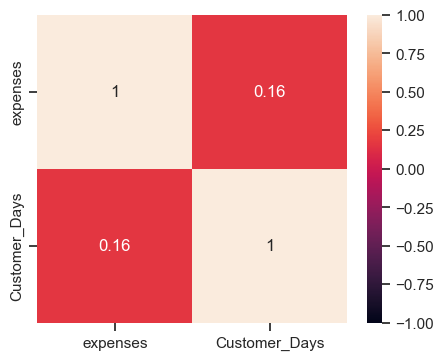

In [41]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(df[['expenses', 'Customer_Days']].corr(), vmin=-1, vmax=1, annot=True)
plt.show(3)

O gasto em ambas as classificações seria muito próximo.

**7. Clientes com maior idade tendem a aceitar menos campanhas.**

In [42]:
idade_mediana = df['Age'].median()
idade_df[f'{idade_mediana}+'] = df['Age'].map(lambda x: 1 if x > idade_mediana else 0)

In [43]:
idade_df.groupby([f'{idade_mediana}+'])["AcceptedCmpOverall"].agg(['count', 'sum', 'mean', 'std'])

,count,sum,mean,std
50.0+,,,,
0,1051,316,0.300666,0.700333
1,970,295,0.304124,0.659364


Ambas as classes possuem uma distribuição semelhante. Para ter certeza, será necessário um teste estatístico.

**8. Clientes casados têm um maior número de filhos.**

In [44]:
df.groupby('marital_status')['kids'].agg(['sum', 'mean', 'median', 'std'])

,sum,mean,median,std
marital_status,,,,
Divorced,219,1.023364,1.0,0.753344
Married,767,0.977070,1.0,0.724558
Single,381,0.860045,1.0,0.771850
Together,500,0.982318,1.0,0.748806
Widow,59,0.842857,1.0,0.734960


Olhando para a média, não é possível afirmar que casados possuam um numero maior de filhos do que as outras categorias. Para  ter certeza, um teste será aplicado.

**9. Clientes que têm um maior salário gastam mais.**

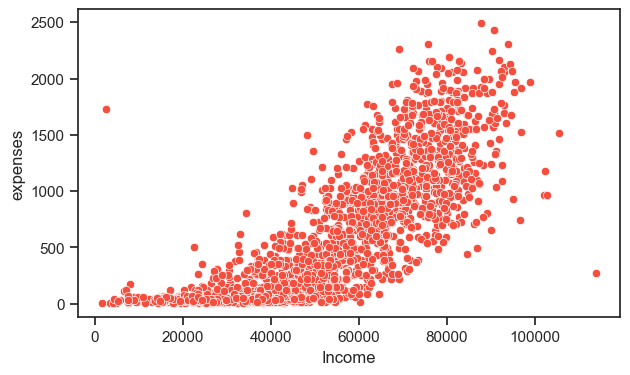

In [45]:
f, ax = plt.subplots(figsize=(7, 4))
sns.set_palette(sns.color_palette(["#F44E3F"]))
sns.scatterplot(data=df, x='Income', y='expenses')
plt.show()

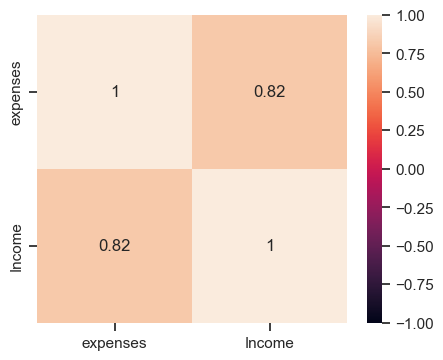

In [46]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(df[['expenses', 'Income']].corr(), vmin=-1, vmax=1, annot=True)
plt.show(3)

**Apesar da correlação alta, não é possível dar certeza de que clientes com maiores salários gastam mais. Um teste será realizado para se ter certeza.**